# NBA Game Stats EDA (2017 - 2022)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


## Legend

The following is a legend which describes the content of the fields which appear in the EDA 

| Field	| Definition |
|-------|---------------------|
| date           |            |
| home_team      | Home team id|
| home_fg        | Home team field goal|
| home_fga       | Home team field goal attempts|
| home_fg_pct    | Home team field goal percentage|
| home_fg3       | Home team 3 point field goals|
| home_fg3a      | Home team 3 point field goal attempts|
| home_fg3_pct   | Home team 3 point field goal percentage|
| home_ft        | Home team free throw|
| home_fta       | Home team free throw attempts|
| home_ft_pct    | Home team free throw percentage|
| home_orb       | Home team Offensive Rebounds|
| home_drb       | Home team Defensive Rebounds|
| home_trb       | Home team Total Rebounds|
| home_ast       | Home team Assists |
| home_stl       | Home team Steals|
| home_blk       | Home team Blocks|
| home_tov       | Home team Turnovers|
| home_pf        | Home team Personal Fouls|
| home_pts       | Home points|
| away_team      | Away team id|
| away_fg        | Away team field goal|
| away_fga       | Away team field goal attempts|
| away_fg_pct    | Away team field goal percentage|
| away_fg3       | Away team 3 point field goals|
| away_fg3a      | Away team 3 point field goal attempts|
| away_fg3_pct   | Away team 3 point field goal percentage|
| away_ft        | Away team free throw|
| away_fta       | Away team free throw attempts|
| away_ft_pct    | Away team free throw percentage|
| away_orb       | Away team Offensive Rebounds|
| away_drb       | Away team Defensive Rebounds|
| away_trb       | Away team Total Rebounds|
| away_ast       | Away team Assists |
| away_stl       | Away team Steals|
| away_blk       | Away team Blocks|
| away_tov       | Away team Turnovers|
| away_pf        | Away team Personal Fouls|
| away_pts       | Away team Away points|
| arena          | Arena|

## EDA 2015 - 2016

In [33]:
df1 = pd.read_parquet('content/[2015, 2016]_game_stats.parquet.gzip')

### Examine the current data

This is just a quick visual inspectaion of the data to identify what data types are being used in the data frame.

In [34]:
df1.head()

,date,home_team,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,...,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts,arena
0,"Tue, Mar 10, 2015",BRK,35,84,.417,6,16,.375,15,23,...,8,33,41,31,10,4,10,19,111,Barclays Center
1,"Tue, Mar 10, 2015",DAL,33,81,.407,5,20,.250,23,33,...,12,38,50,25,11,5,12,28,127,American Airlines Center
2,"Tue, Mar 10, 2015",SAS,41,85,.482,11,18,.611,24,30,...,18,28,46,19,6,5,9,26,107,AT&T Center
3,"Tue, Mar 10, 2015",UTA,30,70,.429,6,18,.333,21,29,...,8,30,38,17,5,5,12,22,82,EnergySolutions Arena
4,"Tue, Mar 10, 2015",LAL,32,75,.427,3,13,.231,26,30,...,12,30,42,20,10,8,12,23,85,STAPLES Center


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2460 entries, 0 to 2999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2460 non-null   object
 1   home_team     2460 non-null   object
 2   home_fg       2460 non-null   object
 3   home_fga      2460 non-null   object
 4   home_fg_pct   2460 non-null   object
 5   home_fg3      2460 non-null   object
 6   home_fg3a     2460 non-null   object
 7   home_fg3_pct  2460 non-null   object
 8   home_ft       2460 non-null   object
 9   home_fta      2460 non-null   object
 10  home_ft_pct   2460 non-null   object
 11  home_orb      2460 non-null   object
 12  home_drb      2460 non-null   object
 13  home_trb      2460 non-null   object
 14  home_ast      2460 non-null   object
 15  home_stl      2460 non-null   object
 16  home_blk      2460 non-null   object
 17  home_tov      2460 non-null   object
 18  home_pf       2460 non-null   object
 19  home_pts   

### Correct data tpes

In [36]:
# convert appropriate columns to numeric values.
columns = df1.columns
date_features = ['date']
string_features = [ 'home_team', 'away_team', 'arena']
numeric_features = [ c for c in columns if c not in string_features + date_features]

df1[numeric_features] = df1[numeric_features].apply(pd.to_numeric)
df1[date_features] = df1[date_features].apply(pd.to_datetime)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2460 entries, 0 to 2999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2460 non-null   datetime64[ns]
 1   home_team     2460 non-null   object        
 2   home_fg       2460 non-null   int64         
 3   home_fga      2460 non-null   int64         
 4   home_fg_pct   2460 non-null   float64       
 5   home_fg3      2460 non-null   int64         
 6   home_fg3a     2460 non-null   int64         
 7   home_fg3_pct  2460 non-null   float64       
 8   home_ft       2460 non-null   int64         
 9   home_fta      2460 non-null   int64         
 10  home_ft_pct   2460 non-null   float64       
 11  home_orb      2460 non-null   int64         
 12  home_drb      2460 non-null   int64         
 13  home_trb      2460 non-null   int64         
 14  home_ast      2460 non-null   int64         
 15  home_stl      2460 non-null   int64        

### Descriptive statistics and identifying correlations and outliers

In [38]:
df1.describe()

,date,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
count,2460,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,2015-07-21 11:09:39.512195328,38.268293,84.046341,0.456459,8.278455,23.229675,0.354478,17.798374,23.573984,0.756848,...,0.753150,10.536585,32.452439,42.989024,21.597967,7.763415,4.669106,13.886585,20.597561,100.072358
min,2014-10-28 00:00:00,19.000000,60.000000,0.294000,0.000000,4.000000,0.000000,1.000000,4.000000,0.167000,...,0.320000,1.000000,16.000000,20.000000,6.000000,0.000000,0.000000,3.000000,7.000000,66.000000
25%,2015-01-19 00:00:00,35.000000,79.000000,0.418000,6.000000,18.000000,0.286000,14.000000,18.000000,0.692000,...,0.684000,8.000000,29.000000,39.000000,18.000000,6.000000,3.000000,11.000000,18.000000,92.000000
50%,2015-07-21 12:00:00,38.000000,84.000000,0.456000,8.000000,23.000000,0.350000,17.000000,23.000000,0.765000,...,0.760000,10.000000,32.000000,43.000000,21.000000,8.000000,4.000000,14.000000,20.000000,100.000000
75%,2016-01-18 00:00:00,42.000000,88.000000,0.494000,10.000000,28.000000,0.421000,22.000000,28.000000,0.828000,...,0.829000,13.000000,36.000000,47.000000,25.000000,10.000000,6.000000,16.000000,23.000000,108.000000
max,2016-04-13 00:00:00,56.000000,125.000000,0.684000,22.000000,47.000000,0.750000,44.000000,56.000000,1.000000,...,1.000000,38.000000,55.000000,81.000000,39.000000,20.000000,15.000000,28.000000,38.000000,147.000000
std,NaN,4.973739,7.141306,0.055433,3.407063,6.651043,0.103667,6.008940,7.546185,0.103590,...,0.107658,3.886123,5.205943,6.455551,4.842681,2.971349,2.483508,3.977333,4.366849,11.739221


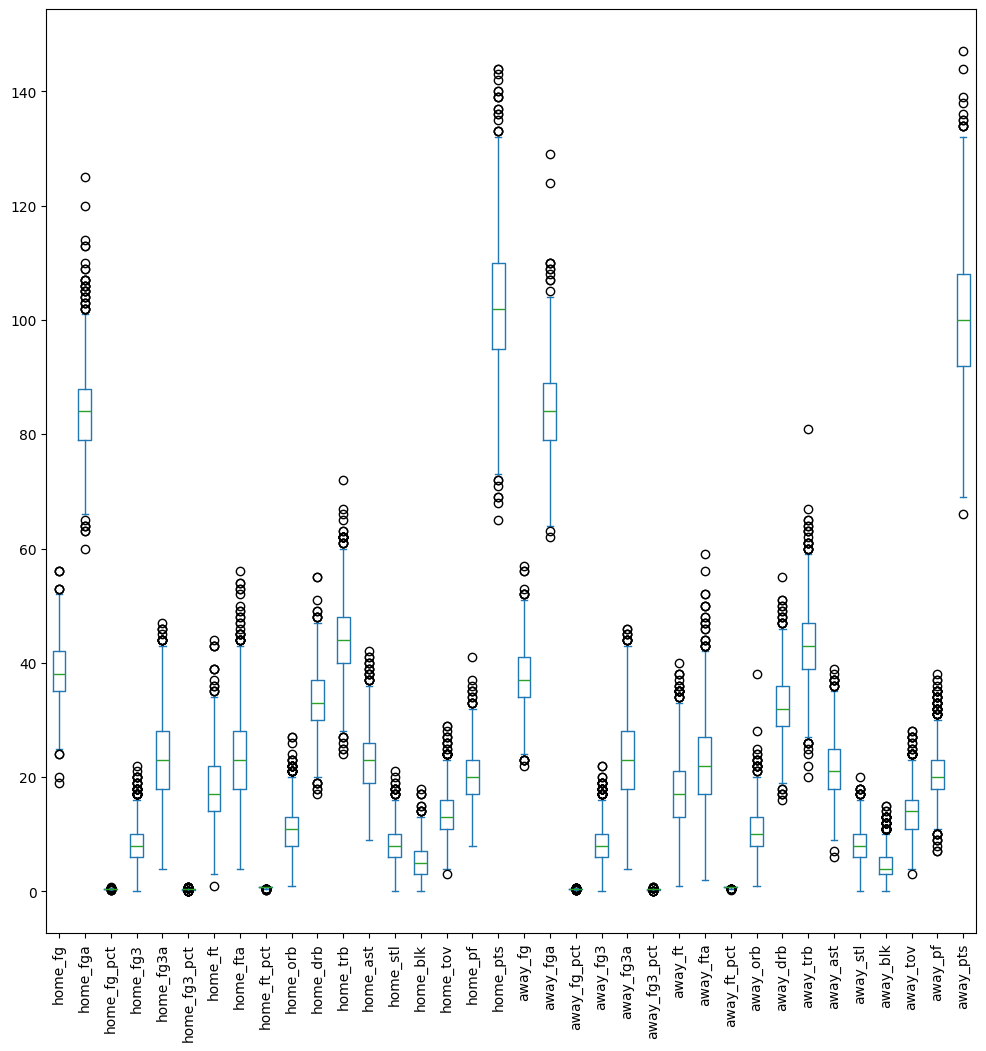

In [39]:
df1[numeric_features].plot.box(figsize=(12, 12), rot=90)
plt.show()

**_Note:_** _There are quite a few outliers. They can probably be fixed by running a log function on the numeric values. See EDA directory for correlation_table excel file._

In [40]:
df1[numeric_features].corr()

,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,home_orb,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
home_fg,1.000000,0.423871,0.776919,0.315845,0.077416,0.372834,-0.199368,-0.207869,-0.002337,0.000892,...,-0.003108,0.044917,-0.321035,-0.231853,0.075814,-0.072064,-0.154394,0.055872,-0.151238,0.253387
home_fga,0.423871,1.000000,-0.235781,0.106022,0.266028,-0.116952,-0.224906,-0.227510,-0.032349,0.541995,...,0.038052,-0.023038,0.422828,0.327112,0.118766,-0.168212,0.247474,0.118420,-0.142013,0.236850
home_fg_pct,0.776919,-0.235781,1.000000,0.262183,-0.103823,0.482304,-0.056479,-0.063205,0.018489,-0.372112,...,-0.031444,0.063598,-0.634457,-0.473360,-0.000463,0.038367,-0.335116,-0.023497,-0.064245,0.108423
home_fg3,0.315845,0.106022,0.262183,1.000000,0.742283,0.683814,-0.138846,-0.139559,-0.008160,-0.074515,...,-0.017131,0.027227,-0.081117,-0.049025,0.059460,0.027158,-0.115508,0.024419,-0.127874,0.073019
home_fg3a,0.077416,0.266028,-0.103823,0.742283,1.000000,0.063744,-0.119837,-0.112134,-0.022554,0.088613,...,0.008948,0.001350,0.173196,0.140483,0.084192,0.040284,-0.062585,0.088796,-0.086764,0.083092
home_fg3_pct,0.372834,-0.116952,0.482304,0.683814,0.063744,1.000000,-0.078064,-0.085673,0.006506,-0.208496,...,-0.039341,0.044988,-0.283140,-0.201250,-0.011753,-0.003025,-0.108164,-0.038505,-0.092714,0.014481
home_ft,-0.199368,-0.224906,-0.056479,-0.138846,-0.119837,-0.078064,1.000000,0.920785,0.313099,0.050728,...,0.011072,0.060520,-0.101239,-0.045210,0.066921,-0.005907,0.024495,0.010086,0.732333,0.224710
home_fta,-0.207869,-0.227510,-0.063205,-0.139559,-0.112134,-0.085673,0.920785,1.000000,-0.054901,0.082345,...,0.002893,0.068358,-0.031571,0.015690,0.067701,-0.008596,0.025502,0.026396,0.805751,0.223720
home_ft_pct,-0.002337,-0.032349,0.018489,-0.008160,-0.022554,0.006506,0.313099,-0.054901,1.000000,-0.074351,...,0.031626,-0.013840,-0.182457,-0.155470,0.001540,-0.001187,-0.011191,-0.039311,-0.067950,0.021397
home_orb,0.000892,0.541995,-0.372112,-0.074515,0.088613,-0.208496,0.050728,0.082345,-0.074351,1.000000,...,0.027676,-0.022979,-0.031521,-0.039252,0.014740,0.017455,0.209606,0.022619,0.073639,0.038099


### Observe categorical / textual data

In [41]:
for cat in string_features:
    print(df1[cat].value_counts())
    print('='*100)

home_team
BRK    82
DAL    82
CHI    82
CLE    82
HOU    82
NYK    82
DET    82
SAC    82
MIN    82
ORL    82
NOP    82
LAC    82
MEM    82
TOR    82
WAS    82
IND    82
POR    82
GSW    82
PHO    82
DEN    82
OKC    82
MIL    82
MIA    82
BOS    82
PHI    82
CHO    82
LAL    82
UTA    82
SAS    82
ATL    82
Name: count, dtype: int64
away_team
NOP    82
CLE    82
PHO    82
UTA    82
WAS    82
IND    82
SAS    82
LAL    82
CHO    82
OKC    82
PHI    82
POR    82
DEN    82
BOS    82
GSW    82
MIA    82
MIL    82
HOU    82
MIN    82
ATL    82
LAC    82
ORL    82
BRK    82
MEM    82
CHI    82
SAC    82
DET    82
NYK    82
TOR    82
DAL    82
Name: count, dtype: int64
arena
STAPLES Center                164
Barclays Center                82
Moda Center                    82
Philips Arena                  82
United Center                  82
Quicken Loans Arena            82
Toyota Center                  82
Madison Square Garden (IV)     82
The Palace of Auburn Hills     82
Smoothie King Ce

## EDA 2017 - 2018


In [42]:
df2 = pd.read_parquet('content/[2017, 2018]_game_stats.parquet.gzip')

### Examine the current data

This is just a quick visual inspectaion of the data to identify what data types are being used in the data frame.

In [43]:
df2.head()

,date,home_team,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,...,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts,arena
0,"Tue, Oct 25, 2016",CLE,45,94,.479,13,35,.371,14,19,...,13,29,42,17,6,6,18,22,88,Quicken Loans Arena
1,"Tue, Oct 25, 2016",POR,39,75,.520,13,19,.684,22,22,...,6,25,31,19,9,5,11,19,104,Moda Center
2,"Tue, Oct 25, 2016",GSW,40,85,.471,7,33,.212,13,18,...,21,34,55,25,13,3,13,19,129,Oracle Arena
3,"Wed, Oct 26, 2016",IND,47,93,.505,10,19,.526,26,34,...,10,39,49,26,8,8,15,27,121,Bankers Life Fieldhouse
4,"Wed, Oct 26, 2016",ORL,34,89,.382,6,18,.333,22,28,...,16,36,52,27,5,7,10,22,108,Amway Center


In [44]:
df2.tail()

,date,home_team,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,...,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts,arena
2455,"Wed, Apr 11, 2018",ORL,33,77,.429,13,32,.406,22,27,...,18,32,50,17,5,1,12,25,92,Amway Center
2456,"Wed, Apr 11, 2018",PHI,52,105,.495,15,36,.417,11,15,...,10,33,43,22,6,5,20,17,95,Wells Fargo Center
2457,"Wed, Apr 11, 2018",LAC,41,83,.494,6,18,.333,12,28,...,10,39,49,25,8,6,17,23,115,STAPLES Center
2458,"Wed, Apr 11, 2018",POR,41,89,.461,9,24,.375,11,16,...,14,39,53,18,5,7,14,19,93,Moda Center
2459,"Wed, Apr 11, 2018",SAC,38,80,.475,7,26,.269,13,20,...,8,32,40,11,2,6,14,24,83,Golden 1 Center


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2460 non-null   object
 1   home_team     2460 non-null   object
 2   home_fg       2460 non-null   object
 3   home_fga      2460 non-null   object
 4   home_fg_pct   2460 non-null   object
 5   home_fg3      2460 non-null   object
 6   home_fg3a     2460 non-null   object
 7   home_fg3_pct  2460 non-null   object
 8   home_ft       2460 non-null   object
 9   home_fta      2460 non-null   object
 10  home_ft_pct   2460 non-null   object
 11  home_orb      2460 non-null   object
 12  home_drb      2460 non-null   object
 13  home_trb      2460 non-null   object
 14  home_ast      2460 non-null   object
 15  home_stl      2460 non-null   object
 16  home_blk      2460 non-null   object
 17  home_tov      2460 non-null   object
 18  home_pf       2460 non-null   object
 19  home_p

**_Note:_** _There are no missing items but Let's isolate the features that need to be converted to numeric columns and update the dataframe for further analysis._

### Correct data types

In [46]:
# convert appropriate columns to numeric values.
columns = df2.columns
date_features = ['date']
string_features = [ 'home_team', 'away_team', 'arena']
numeric_features = [ c for c in columns if c not in string_features + date_features]

df2[numeric_features] = df2[numeric_features].apply(pd.to_numeric)
df2[date_features] = df2[date_features].apply(pd.to_datetime)

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2460 non-null   datetime64[ns]
 1   home_team     2460 non-null   object        
 2   home_fg       2460 non-null   int64         
 3   home_fga      2460 non-null   int64         
 4   home_fg_pct   2460 non-null   float64       
 5   home_fg3      2460 non-null   int64         
 6   home_fg3a     2460 non-null   int64         
 7   home_fg3_pct  2460 non-null   float64       
 8   home_ft       2460 non-null   int64         
 9   home_fta      2460 non-null   int64         
 10  home_ft_pct   2460 non-null   float64       
 11  home_orb      2460 non-null   int64         
 12  home_drb      2460 non-null   int64         
 13  home_trb      2460 non-null   int64         
 14  home_ast      2460 non-null   int64         
 15  home_stl      2460 non-null   int64   

### Descriptive statistics and identifying correlations and outliers

In [48]:
df2.describe()

,date,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
count,2460,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,2017-07-16 11:36:35.121951232,39.773577,85.684146,0.465201,10.201626,28.048374,0.363426,17.526829,22.782114,0.770216,...,0.769476,9.841870,33.104065,42.945935,22.320732,7.705285,4.583740,13.595528,20.206504,104.648374
min,2016-10-25 00:00:00,21.000000,62.000000,0.282000,1.000000,7.000000,0.056000,1.000000,1.000000,0.143000,...,0.176000,0.000000,18.000000,22.000000,7.000000,0.000000,0.000000,3.000000,8.000000,68.000000
25%,2017-01-16 00:00:00,36.000000,81.000000,0.429000,8.000000,23.750000,0.300000,13.000000,18.000000,0.708000,...,0.704000,7.000000,29.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,96.000000
50%,2017-07-15 00:00:00,40.000000,86.000000,0.463000,10.000000,27.000000,0.360000,17.000000,22.000000,0.778000,...,0.778000,10.000000,33.000000,43.000000,22.000000,8.000000,4.000000,13.000000,20.000000,105.000000
75%,2018-01-11 00:00:00,43.000000,90.000000,0.500000,12.000000,32.000000,0.423000,21.000000,27.000000,0.839000,...,0.842000,12.000000,37.000000,47.000000,26.000000,10.000000,6.000000,16.000000,23.000000,113.000000
max,2018-04-11 00:00:00,57.000000,119.000000,0.639000,24.000000,61.000000,0.684000,41.000000,64.000000,1.000000,...,1.000000,26.000000,56.000000,68.000000,46.000000,19.000000,15.000000,27.000000,42.000000,148.000000
std,NaN,5.004304,6.996995,0.053999,3.507269,6.749670,0.092378,6.014596,7.326000,0.101155,...,0.103604,3.679377,5.294858,6.333802,5.151702,2.916301,2.413004,3.777814,4.307379,12.237065


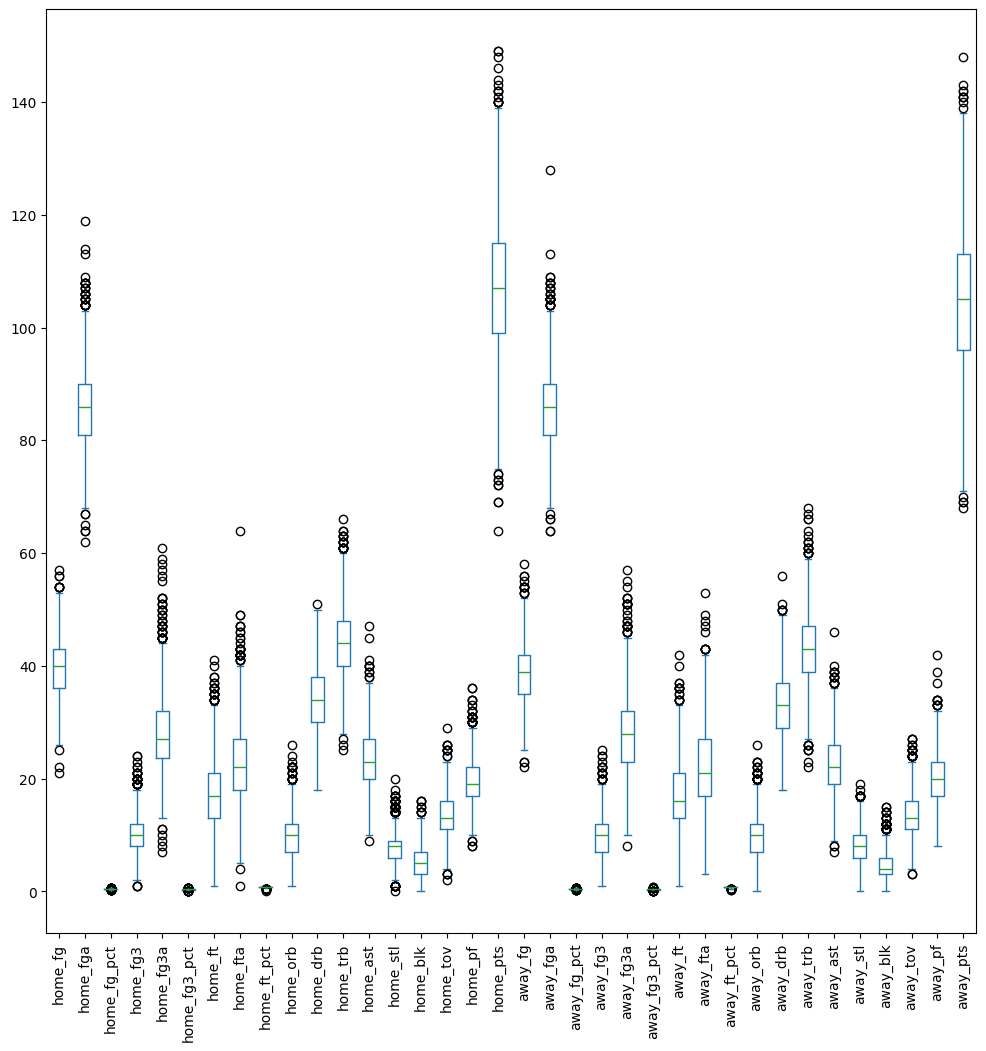

In [49]:
df2[numeric_features].plot.box(figsize=(12, 12), rot=90)
plt.show()

**_Note:_** _There are quite a few outliers. They can probably be fixed by running a log function on the numeric values. See EDA directory for correlation_table excel file._

In [50]:
df2[numeric_features].corr()

,home_fg,home_fga,home_fg_pct,home_fg3,home_fg3a,home_fg3_pct,home_ft,home_fta,home_ft_pct,home_orb,...,away_ft_pct,away_orb,away_drb,away_trb,away_ast,away_stl,away_blk,away_tov,away_pf,away_pts
home_fg,1.000000,0.440849,0.772822,0.298114,0.042391,0.357310,-0.200567,-0.193103,-0.045290,0.031352,...,0.025611,0.023896,-0.346183,-0.275517,0.146426,-0.085300,-0.143663,0.066505,-0.145477,0.259298
home_fga,0.440849,1.000000,-0.223978,0.033701,0.231207,-0.178588,-0.219555,-0.202790,-0.079140,0.520885,...,-0.011547,-0.043564,0.406096,0.314177,0.168090,-0.167568,0.267710,0.155643,-0.112339,0.273293
home_fg_pct,0.772822,-0.223978,1.000000,0.300104,-0.116193,0.516655,-0.059923,-0.063266,0.006835,-0.330839,...,0.036487,0.058270,-0.659302,-0.517306,0.040375,0.027967,-0.341394,-0.036677,-0.074771,0.090829
home_fg3,0.298114,0.033701,0.300104,1.000000,0.699808,0.701274,-0.122789,-0.132251,0.008929,-0.143192,...,-0.014090,-0.021888,-0.118814,-0.112040,0.071684,-0.011126,-0.105308,-0.058726,-0.141875,0.100424
home_fg3a,0.042391,0.231207,-0.116193,0.699808,1.000000,0.012347,-0.093559,-0.094282,-0.008656,0.017361,...,-0.035208,-0.039238,0.211827,0.154287,0.102530,-0.016382,-0.065655,0.014372,-0.079696,0.120790
home_fg3_pct,0.357310,-0.178588,0.516655,0.701274,0.012347,1.000000,-0.072441,-0.087966,0.030978,-0.215750,...,0.012272,0.012682,-0.363388,-0.296414,-0.004493,0.003740,-0.082562,-0.086871,-0.118026,0.018640
home_ft,-0.200567,-0.219555,-0.059923,-0.122789,-0.093559,-0.072441,1.000000,0.930989,0.319802,0.052033,...,0.061795,0.016207,-0.082746,-0.059758,0.039522,-0.006076,0.001330,0.028156,0.725420,0.209043
home_fta,-0.193103,-0.202790,-0.063266,-0.132251,-0.094282,-0.087966,0.930989,1.000000,-0.026268,0.093771,...,0.064413,0.022091,-0.024262,-0.007449,0.042475,-0.007765,0.012857,0.034930,0.787242,0.214454
home_ft_pct,-0.045290,-0.079140,0.006835,0.008929,-0.008656,0.030978,0.319802,-0.026268,1.000000,-0.097337,...,0.007313,-0.019326,-0.161085,-0.145888,-0.012769,-0.001076,-0.036504,-0.014057,-0.037608,0.002120
home_orb,0.031352,0.520885,-0.330839,-0.143192,0.017361,-0.215750,0.052033,0.093771,-0.097337,1.000000,...,-0.009412,-0.033698,-0.069337,-0.077539,0.000245,0.042241,0.220545,0.053792,0.084056,0.019319


### Observe categorical / textual data

In [ ]:
for cat in string_features:
    print(df2[cat].value_counts())
    print('='*100)

## EDA 2019 - 2020

### Examine the current data

This is just a quick visual inspectaion of the data to identify what data types are being used in the data frame.

In [ ]:
df3 = pd.read_parquet('content/[2019, 2020]_game_stats.parquet.gzip')
df3.head()


In [ ]:
df3.info()

### Correct data types

In [ ]:
# convert appropriate columns to numeric values.

df3[numeric_features] = df3[numeric_features].apply(pd.to_numeric)
df3[date_features] = df3[date_features].apply(pd.to_datetime)

In [ ]:
df3.info()

### Descriptive statistics and identifying correlations and outliers

In [ ]:
df3.describe()

In [ ]:
df3[numeric_features].plot.box(figsize=(12, 12), rot=90)
plt.show()

In [ ]:
df3[numeric_features].corr()

### Observe categorical / textual data

In [ ]:
for cat in string_features:
    print(df3[cat].value_counts())
    print('='*100)

**_Note:_** _This two year span had fewer games per team that then 2017 - 2018  period._

## EDA 2021 - 2022

In [ ]:
df4 = pd.read_parquet('content/[2021, 2022]_game_stats.parquet.gzip')

### Examine the current data

In [ ]:
df4.head()

In [ ]:
df4.info()

### Correct data types

In [ ]:
df4[numeric_features] = df4[numeric_features].apply(pd.to_numeric)
df4[date_features] = df4[date_features].apply(pd.to_datetime)

In [ ]:
df4.info()

### Descriptive statistics and identifying correlations and outliers

In [ ]:
df4.describe()

In [ ]:
df4[numeric_features].plot.box(figsize=(12, 12), rot=90)
plt.show()

In [ ]:
df4[numeric_features].corr()

### Observe categorical / textual data

In [ ]:
for cat in string_features:
    print(df4[cat].value_counts())
    print('='*100)

## Observations

1. It appears there are some correlations and I have included an excel sheet in the **ea** directory which is color coded to show the strongest correlations. Over all the year periods, the one constant correlation appears to be between **home_ft** and **home_fta**. The correlation value is 0.93. Another strong correlation is **away_pts** and **away_fg** with a correlation value of 0.87.


2. We should be able to transform the home team and away team using some sort of ordinal encoding where 1 stands for home team and 2 stands for away team and 0 means the team is excluded.

3. There were quite a few outliers in the data and these may be fixable by using a log process on the values.

4. I noticed the number of games the teams played went down after 2018. This may have been due to the COVID pandemic which was became more impactful during late 2019 to early 2020 and extended into 2022.